In [1]:
import rasterio

In [2]:
udm_path = r"C:\development\coastseg-planet\floris_roi_TOAR_disabled\5e38c970-26c9-4d7f-aedc-952900e4b4a7\PSScene\20230401_102117_56_2488_3B_udm2_clip.tif"

# Read the UTM mask
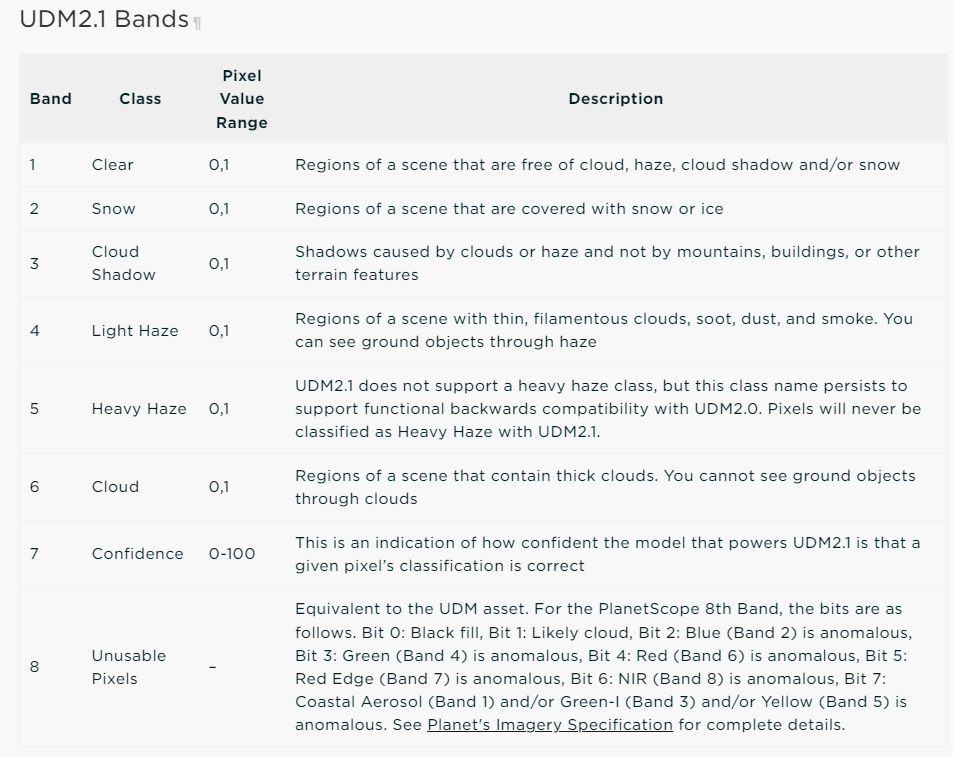

In [3]:
with rasterio.open(udm_path) as src:
    print(src.profile)
    print(src.indexes)
    src.read(1)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1491, 'height': 1492, 'count': 8, 'crs': CRS.from_epsg(32631), 'transform': Affine(3.0, 0.0, 662619.0,
       0.0, -3.0, 5927034.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
(1, 2, 3, 4, 5, 6, 7, 8)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1491, 'height': 1492, 'count': 8, 'crs': CRS.from_epsg(32631), 'transform': Affine(3.0, 0.0, 662619.0,
       0.0, -3.0, 5927034.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
(1, 2, 3, 4, 5, 6, 7, 8)


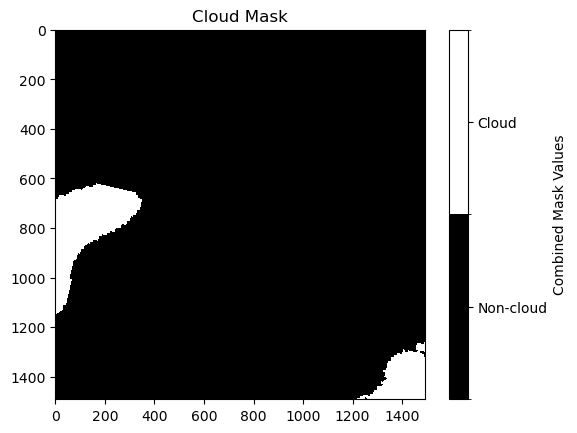

0 1
[0 1]


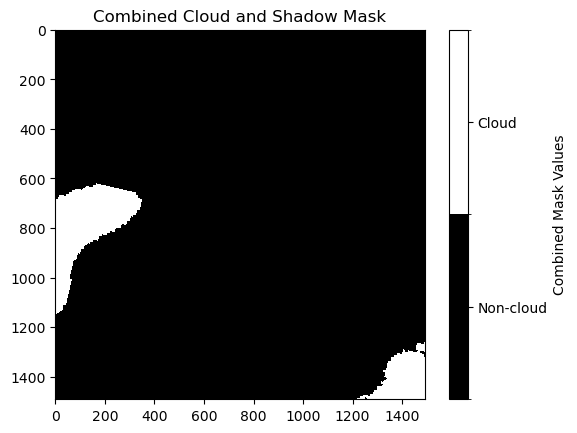

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# get the cloud and shadow mask
# the cloud mask is either 1 for cloud or 0 for non-cloud ( same is true for shadow mask)
# cloud mask is band 6 and cloud shadow mask is band 3
with rasterio.open(udm_path) as src:
    print(src.profile)
    print(src.indexes)
    cloud_mask=src.read(6)
    cmap = plt.get_cmap('gray', 2) # Get the colormap and specify the number of discrete colors
    norm = colors.BoundaryNorm(np.arange(-0.5,2), cmap.N) # Define the color boundaries
    img = plt.imshow(cloud_mask, cmap=cmap, norm=norm) # Use the colormap and normalization
    cbar = plt.colorbar(img, ticks=[0,1], label='Combined Mask Values') # Add colorbar with label and ticks
    cbar.set_ticklabels(['Non-cloud', 'Cloud']) # Set the tick labels
    plt.title('Cloud Mask') # Add title
    plt.show()
    print(np.min(cloud_mask),np.max(cloud_mask))
    print(np.unique(cloud_mask))
    cloud_shadow_mask=src.read(3)
    # combine the cloud and shadow mask
    combined_mask = np.logical_or(cloud_mask, cloud_shadow_mask)
    # plot the combined mask
    # add a legend
    # plt.imshow(combined_mask)
    cmap = plt.get_cmap('gray', 2) # Get the colormap and specify the number of discrete colors
    norm = colors.BoundaryNorm(np.arange(-0.5,2), cmap.N) # Define the color boundaries
    img = plt.imshow(combined_mask, cmap=cmap, norm=norm) # Use the colormap and normalization
    cbar = plt.colorbar(img, ticks=[0,1], label='Combined Mask Values') # Add colorbar with label and ticks
    cbar.set_ticklabels(['Non-cloud', 'Cloud']) # Set the tick labels
    plt.title('Combined Cloud and Shadow Mask')
    plt.show()
    
    # write the combined mask to a new file
    profile = src.profile
    profile.update(dtype=rasterio.uint8, count=1)
    
    # write to a new file
    mask_out = combined_mask>0
    
    with rasterio.open(r'C:\development\coastseg-planet\CoastSeg-Planet\combined_mask_bool.tif', 'w', **profile) as dst:
        dst.write(mask_out.astype(rasterio.uint8), 1)
    
    with rasterio.open(r'C:\development\coastseg-planet\CoastSeg-Planet\combined_mask.tif', 'w', **profile) as dst:
        dst.write(combined_mask.astype(rasterio.uint8), 1)
    

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1491, 'height': 1492, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(3.0, 0.0, 662619.0,
       0.0, -3.0, 5927034.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
(1,)


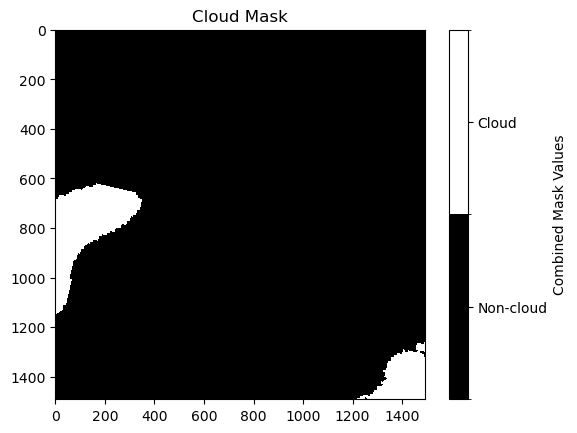

0 1
[0 1]


In [18]:
with rasterio.open(r"C:\development\coastseg-planet\CoastSeg-Planet\combined_mask.tif") as src:
    print(src.profile)
    print(src.indexes)
    cloud_mask=src.read(1)
    cmap = plt.get_cmap('gray', 2) # Get the colormap and specify the number of discrete colors
    norm = colors.BoundaryNorm(np.arange(-0.5,2), cmap.N) # Define the color boundaries
    img = plt.imshow(cloud_mask, cmap=cmap, norm=norm) # Use the colormap and normalization
    cbar = plt.colorbar(img, ticks=[0,1], label='Combined Mask Values') # Add colorbar with label and ticks
    cbar.set_ticklabels(['Non-cloud', 'Cloud']) # Set the tick labels
    plt.title('Cloud Mask') # Add title
    plt.show()
    print(np.min(cloud_mask),np.max(cloud_mask))
    print(np.unique(cloud_mask))

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1491, 'height': 1492, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(3.0, 0.0, 662619.0,
       0.0, -3.0, 5927034.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
(1,)


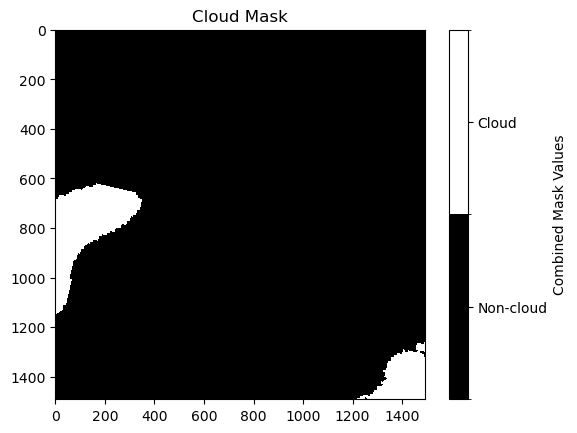

0 1
[0 1]


In [20]:
with rasterio.open(r"C:\development\coastseg-planet\CoastSeg-Planet\combined_mask_bool.tif") as src:
    print(src.profile)
    print(src.indexes)
    cloud_mask=src.read(1)
    cmap = plt.get_cmap('gray', 2) # Get the colormap and specify the number of discrete colors
    norm = colors.BoundaryNorm(np.arange(-0.5,2), cmap.N) # Define the color boundaries
    img = plt.imshow(cloud_mask, cmap=cmap, norm=norm) # Use the colormap and normalization
    cbar = plt.colorbar(img, ticks=[0,1], label='Combined Mask Values') # Add colorbar with label and ticks
    cbar.set_ticklabels(['Non-cloud', 'Cloud']) # Set the tick labels
    plt.title('Cloud Mask') # Add title
    plt.show()
    print(np.min(cloud_mask),np.max(cloud_mask))
    print(np.unique(cloud_mask))

In [ ]:

def load_udm(udm_filename):
    '''Load single-band bit-encoded UDM as a 2D array
    
    Source: 
        https://github.com/planetlabs/notebooks/blob/master/jupyter-notebooks/udm/udm.ipynb
        
    '''
    with rasterio.open(udm_filename, 'r') as src:
        udm = src.read()[0,...]
    return udm

In [39]:
import os
udm_path=r'C:\development\coastseg-planet\CoastSeg-Planet\combined_mask_bool.tif'
base_filename = os.path.basename(udm_path.split('.')[-2])
os.path.join(os.path.dirname(udm_path), base_filename+'_combined_mask.tif')

'combined_mask_bool_combined_mask.tif'

In [40]:
os.path.dirname(udm_path)

'C:\\development\\coastseg-planet\\CoastSeg-Planet'

In [33]:
import os
udm_path=r'C:\development\coastseg-planet\CoastSeg-Planet\combined_mask_bool.tif'
base_filename = udm_path.split('.')[-1][0]
new_file_name = 
os.path.join(udm_path.split('.')[:-1][0,])

'C:\\development\\coastseg-planet\\CoastSeg-Planet\\combined_mask_bool'

In [42]:
def create_cloud_and_shadow_mask(udm_path):
    with rasterio.open(udm_path) as src:
        cloud_mask=src.read(6)
        cloud_shadow_mask=src.read(3)
        # combine the cloud and shadow mask
        combined_mask = np.logical_or(cloud_mask, cloud_shadow_mask)
        # write the combined mask to a new file
        profile = src.profile
        profile.update(dtype=rasterio.uint8, count=1)
        # write to a new file
        mask_out = combined_mask>0
        
        base_filename = os.path.basename(udm_path.split('.')[-2])
        combined_path=os.path.join(os.path.dirname(udm_path), base_filename+'_combined_mask.tif')
        combined_bool_path=os.path.join(os.path.dirname(udm_path), base_filename+'_combined_mask_bool.tif')
        
        with rasterio.open(combined_bool_path, 'w', **profile) as dst:
            print(f"Saving combined mask to {combined_bool_path}")
            dst.write(mask_out.astype(rasterio.uint8), 1)
        
        with rasterio.open(combined_path, 'w', **profile) as dst:
            print(f"Saving combined mask to {combined_path}")
            dst.write(combined_mask.astype(rasterio.uint8), 1)
        return combined_mask

In [43]:
import os
# get the corresponding UDM file
dir_path = r'C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene'
files_to_process= []
for file in os.listdir(dir_path):
    
    if file.endswith(".tif") and "udm2" in file:
        udm_path = os.path.join(dir_path, file)
        create_cloud_and_shadow_mask(udm_path)
        
    if file.endswith(".tif") and "udm2" not in file:
        tif_path = os.path.join(dir_path, file)
    
    if file.endswith(".xml"):
        xml_path = os.path.join(dir_path, file)
        
    # calculate the cloud mask and save it
# os.listdir(dir_path)

# get the base name for each tif

# get the corresponding udm file

# put them into a list 

Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102117_56_2488_3B_udm2_clip_combined_mask_bool.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102117_56_2488_3B_udm2_clip_combined_mask.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102119_76_2488_3B_udm2_clip_combined_mask_bool.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102119_76_2488_3B_udm2_clip_combined_mask.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230403_101844_81_247d_3B_udm2_clip_combined_mask_bool.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a0

# CoRegister 2 Planet Images Together
- use a global coregister function and a target cloud mask to mask 1 cloudy and 1 non cloudy image together

In [ ]:
from arosics import COREG, DESHIFTER
import glob
import os
import sys

# try to coregister two planet images together that have clouds now that we can mask out clouds

REFERENCE = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230403_101844_81_247d_3B_AnalyticMS_toar_clip.tif"
INFILE = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230412_094432_88_2439_3B_AnalyticMS_toar_clip.tif"

TARGET_CLOUD_MASK = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230412_094432_88_2439_3B_udm2_clip_combined_mask.tif"

outfile=r"C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregister_with_combined_mask.tif"
# detect and correct global spatial shift 
CR = COREG(REFERENCE, INFILE,
           path_out=outfile,
           max_shift=500, 
           fmt_out='GTIFF',
           out_crea_options=['COMPRESS=DEFLATE'],
           max_iter = 10,
           mask_baddata_tgt = TARGET_CLOUD_MASK)
print(CR)
print(CR.correct_shifts())

In [48]:
# lets try with a local coregistration
from arosics import COREG_LOCAL 
import glob
import os
import sys

# try to coregister two planet images together that have clouds now that we can mask out clouds

REFERENCE = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230403_101844_81_247d_3B_AnalyticMS_toar_clip.tif"
INFILE = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230412_094432_88_2439_3B_AnalyticMS_toar_clip.tif"

TARGET_CLOUD_MASK = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230412_094432_88_2439_3B_udm2_clip_combined_mask.tif"

outfile=r"C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregister_with_combined_mask_LOCAL.tif"


CR = COREG_LOCAL(REFERENCE, INFILE,
                  path_out=outfile,
                  fmt_out='GTIFF',
                  grid_res = 100,  # grid resolution in meters (use default from coastsat planetscope for now)
                  out_crea_options=['COMPRESS=DEFLATE'],
                 max_iter = 10,
                  mask_baddata_tgt = TARGET_CLOUD_MASK,
                  # Hard coded settings
                  nodata = (0,0),
                  min_reliability = 50,
                  )

print(CR)
print(CR.correct_shifts())

Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00
Polygonize progress     |========------------------------------------------| 15.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...
Bounding box of calculated footprint for reference image:
	(662619.0, 5922558.0, 667092.0, 5927034.0)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(662619.0, 5922558.0, 667092.0, 5927034.0)
Matching window position (X,Y): 664855.4990364996/5924794.563420993
Initializing tie points grid...
With respect to the provided bad data mask(s) 13 points of initially 211 have been excluded.
Calculating tie point grid (198 points) using 20 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:05
c:\Users\sf230\anaconda3\envs\coastseg_planet\lib\site-packages\arosics\Tie_Point_Grid.py:384: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  GDF = GDF.replace([np.nan, None], int(self.outFillVal))  # fillna fails with geopandas==0.6.0
c:\Users\sf230\anaconda3\envs\coastseg_planet\lib\site-packages\arosics\Tie_Point_Grid.py:1171: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fullGDF = fullGDF.fillna(False)  # NaNs are due to exclude_previous_outliers
Tr

Found 90 matches.
Performing validity checks...
13 tie points flagged by level 1 filtering (reliability).
8 tie points flagged by level 2 filtering (SSIM).
6 tie points flagged by level 3 filtering (RANSAC)
69 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Writing GeoArray of size (1492, 1491, 4) to C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregister_with_combined_mask_LOCAL.tif.
OrderedDict([('band', None), ('is shifted', True), ('is resampled', True), ('updated map info', ['UTM', 1.0, 1.0, 662619.0, 5927034.0, 3.0, 3.0, 31, 'North', 'WGS-84']), ('updated geotransform', (662619.0, 3.0, 0.0, 5927034.0, 0.0, -3.0)), ('updated projection', 'PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631

In [ ]:
"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102117_56_2488_3B_AnalyticMS_toar_clip.tif"